# Lecture notes for 09 10 2020

# Today's Lecture Plan:

## An Introduction to Radiative Transfer
### $\star$ Definition of Standard Quantities (See PDF notes)
### $\star$ The Radiative Transfer Equation (See PDF notes)
### $\star$ Brightness Temperature

## Challenge time: Change image units from Jy to $T_B$

In [1]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion



                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
#plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer



Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


0.0006752061181598 0.0005309024122026


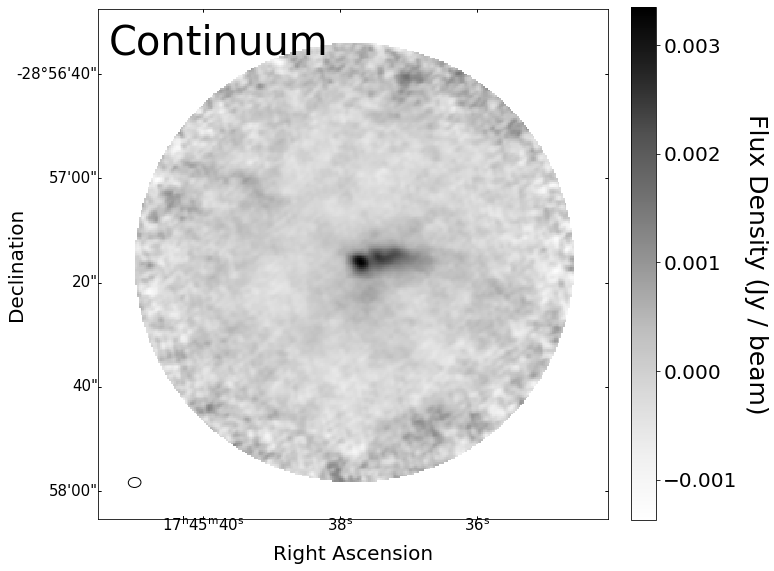

In [2]:
import astropy.io.fits as fits              # I use this to import FITS images. 
                                            # Astropy should be included in your conda installation
from astropy.wcs import WCS                 # This one helps us add coordinates to images
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab

plt.rc('text', usetex=False)

path = 'support_files/H8_continuum.pbcor.fits'# This string is not just the name of a file, but its full address.
                                # If, like this file, it is in the same directory as your notebook,
                                # you can specify just the filename. If it lives elsewhere you need
                                # to give a relative (e.g., data/name.fits or ../directory/name.fits)
                                # or absolute (e.g., EACMills/Project/Data/name.fits) path to the file.


                                # The fits images we will work with consist of two main parts:
                                # (1) An array of 2-4 dimensions that holds the value of each image pixel 
                                # (2) A "header" which contains a summary of information associated with this array                


image = fits.getdata(path)      # This command reads in the data array part of the fits file, so we can manipulate it 
                                # like any other python array
    
header = fits.getheader(path)   # This command reads in the header, which consists of a series of variables 
                                # and associated values

pixel = header['CDELT1'] * 3600 # The pixel scale of the image is a useful quantity to get from the header

    
w1 = WCS(header)                # This command grabs information from the header, but focuses just on the
                                # part of the header that tells you how pixel coordinates correspond to 
                                # sky coordinates        
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)

bmajor = header['BMAJ'] #grabbing beam info from fits header
bminor = header['BMIN']
bposangle = header['BPA']
print(bmajor,bminor)
image_2D = pylab.squeeze(image) #squeeze gets rid of all axes with length=1.


fig1 = pylab.figure(1,figsize=(10,10))       # We will make this figure #1 and give it a size of 10x10

                                             # We also want to make sure that our image is plotted with sky coordinates
ax1 = pylab.subplot(projection=w1)           # We do this by specifying a projection (the wcs from the previous cell)
RA = ax1.coords[0]
Dec = ax1.coords[1]

im1 = plt.imshow(image_2D,cmap='Greys')     # We have a lot of control over how we plot the image.
                                            # Note that each of these options will plot on top of any 
                                            # previously-displayed image. To display an image as a
                                            # new figure, you need to define a new figure command, 
                                            # with a unique figure number, e.g, fig2 = pylab.figure(2)
                                            
                                            # The options below show other ways to customize this figure 
RA.set_ticks(size=-3)                       # Change the length of the tick marks 
Dec.set_ticks(size=-3)                      # (negative values place ticks inside the bounding box)

pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                              # Label the x-axis
pylab.ylabel('Declination',fontsize=20,labelpad=0)                                  # Label the y-axis
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                     # Increase tick label font
pylab.annotate(s='Continuum',fontsize=40,xy=(0.02,0.91),xycoords="axes fraction")   # Add a label in the figure
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04) # Define a color bar
cb.set_label(label='Flux Density (Jy / beam)',fontsize=25,rotation=270,labelpad=30) # Add a colorbar label
cb.ax.tick_params(which = 'major', labelsize = 20);                                 # Increase colorbar fonts

#Plot an example beam
bmaj = bmajor*3600 # Major axis (in arcseconds) 
bmin = bminor*3600 # Minor axis (in arcseconds)
bpa = bposangle

ax1.add_patch(
            patches.Ellipse(
                (20,20),                            #central position to plot
                bmaj/pixel,bmin/pixel,angle=bpa+90, #ellipse parameters
                fill=False,                         # remove background fill
                color='black'
            ))


In [3]:
#Converting Jy/beam to K

bmin= header['BMAJ']*3600*u.arcsec
bmaj=header['BMIN']*3600*u.arcsec
fwhm_to_sigma = 1./(8*np.log(2))**0.5
beam_area = 2.*np.pi*(bmaj*bmin*fwhm_to_sigma**2)
freq = header['RESTFRQ'] * u.Hz
equiv = u.brightness_temperature(freq)
(u.Jy/beam_area).to(u.K, equivalencies=equiv)  


<Quantity 21.82700938 K>

In [4]:
#Replot with the scaled values


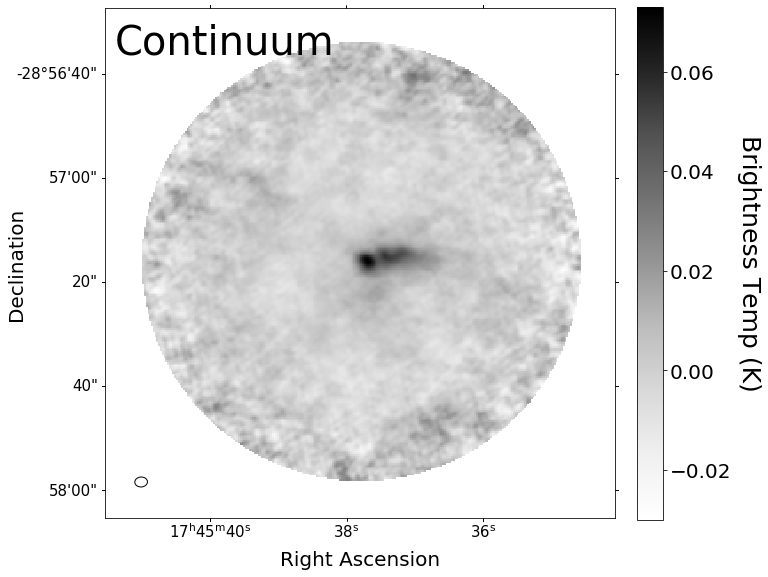

In [5]:
K_image = image_2D*(u.Jy/beam_area).to(u.K, equivalencies=equiv).value

fig2 = pylab.figure(1,figsize=(10,10))       # We will make this figure #1 and give it a size of 10x10

                                             # We also want to make sure that our image is plotted with sky coordinates
ax2 = pylab.subplot(projection=w1)           # We do this by specifying a projection (the wcs from the previous cell)
RA = ax1.coords[0]
Dec = ax1.coords[1]

im2 = plt.imshow(K_image,cmap='Greys')     # We have a lot of control over how we plot the image.
                                            # Note that each of these options will plot on top of any 
                                            # previously-displayed image. To display an image as a
                                            # new figure, you need to define a new figure command, 
                                            # with a unique figure number, e.g, fig2 = pylab.figure(2)
                                            
                                            # The options below show other ways to customize this figure 
RA.set_ticks(size=-3)                       # Change the length of the tick marks 
Dec.set_ticks(size=-3)                      # (negative values place ticks inside the bounding box)

pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                              # Label the x-axis
pylab.ylabel('Declination',fontsize=20,labelpad=0)                                  # Label the y-axis
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)                     # Increase tick label font
pylab.annotate(s='Continuum',fontsize=40,xy=(0.02,0.91),xycoords="axes fraction")   # Add a label in the figure
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04) # Define a color bar
cb.set_label(label='Brightness Temp (K)',fontsize=25,rotation=270,labelpad=30) # Add a colorbar label
cb.ax.tick_params(which = 'major', labelsize = 20);                                 # Increase colorbar fonts

#Plot an example beam
bmaj = header["BMAJ"] * 3600  # Major axis (in arcseconds) 
bmin = header["BMIN"] * 3600 # Minor axis (in arcseconds)
bpa = header["BPA"]

ax2.add_patch(
            patches.Ellipse(
                (20,20),                            #central position to plot
                bmaj/pixel,bmin/pixel,angle=bpa+90, #ellipse parameters
                fill=False,                         # remove background fill
                color='black'
            ))



In this example, we simply need to convert Jy/Beam to Brightness temperture. This turned out to be straightforward as all we really needed to do was obtain the area of the beam (using parameters from the FITS header) and then use AstroPy's unit conversion routines. 